In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time

def plot_last_value(data):
    plt.plot(data.index, data['last_value'], marker='o')
    plt.xlabel('Time')
    plt.ylabel('Last Value')
    plt.title('Real-Time Plot of Last Value')
    plt.grid(True)
    plt.show()

def read_last_value_and_plot():
    conn = sqlite3.connect('\\content\\real_time_plotting.pridb')
    cursor = conn.cursor()

    while True:
        cursor.execute("SELECT * FROM ae_data ORDER BY Time DESC LIMIT 1")
        row = cursor.fetchone()
        if row:
            # Assuming 'timestamp_column' and 'value_column' are your column names
            timestamp = row[0]
            last_value = row[7]
            print(f"Last value at {timestamp}: {last_value}")
            # Plotting
            plot_data = pd.DataFrame({'last_value': [last_value]}, index=[timestamp])
            plot_last_value(plot_data)
        time.sleep(1)  # Adjust the time interval as needed

if __name__ == "__main__":
    read_last_value_and_plot()


OperationalError: no such table: ae_data

Last value at 716: None


<ipython-input-15-92263f2e7553>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)


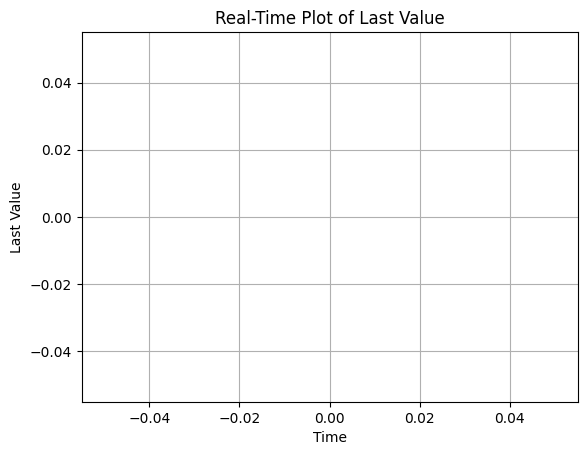

Last value at 716: None


<ipython-input-15-92263f2e7553>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)


Last value at 716: None


<ipython-input-15-92263f2e7553>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)


Last value at 716: None


<ipython-input-15-92263f2e7553>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)


Last value at 716: None


<ipython-input-15-92263f2e7553>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)


Last value at 716: None


<ipython-input-15-92263f2e7553>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)


Last value at 716: None


<ipython-input-15-92263f2e7553>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)


Last value at 716: None


<ipython-input-15-92263f2e7553>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)


Last value at 716: None


<ipython-input-15-92263f2e7553>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)


KeyboardInterrupt: 

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time

# Define global variables to hold plot and axes objects
fig, ax = plt.subplots()
plot_data = pd.DataFrame(columns=['last_value'])

def update_plot(timestamp, last_value):
    global plot_data
    plot_data = plot_data.append({'last_value': last_value}, ignore_index=True)
    ax.clear()
    ax.plot(plot_data.index, plot_data['last_value'], marker='o')
    ax.set_xlabel('Time')
    ax.set_ylabel('Last Value')
    ax.set_title('Real-Time Plot of Last Value')
    ax.grid(True)
    plt.pause(0.05)  # Pause to allow plot to update

def read_last_value_and_plot():
    conn = sqlite3.connect('/content/real_time_plotting.pridb')
    cursor = conn.cursor()

    while True:
        cursor.execute("SELECT * FROM  'ae_data' ORDER BY SetID DESC LIMIT 1")
        row = cursor.fetchone()
        if row:
            timestamp = row[0]  # Assuming the first column is the timestamp
            last_value = row[7]  # Assuming the second column is the value
            print(f"Last value at {timestamp}: {last_value}")
            update_plot(timestamp, last_value)
        time.sleep(5)  # Adjust the time interval as needed

if __name__ == "__main__":
    read_last_value_and_plot()


In [ ]:
# Importing Sqlite3 Module
import sqlite3

try:

	# Making a connection between sqlite3
	# database and Python Program
	sqliteConnection = sqlite3.connect('/content/real_time_plotting.pridb')

	# If sqlite3 makes a connection with python
	# program then it will print "Connected to SQLite"
	# Otherwise it will show errors
	print("Connected to SQLite")

	# Getting all tables from sqlite_master
	sql_query = """SELECT name FROM sqlite_master
	WHERE type='table';"""

	# Creating cursor object using connection object
	cursor = sqliteConnection.cursor()

	# executing our sql query
	cursor.execute(sql_query)
	print("List of tables\n")

	# printing all tables list
	print(cursor.fetchall())

except sqlite3.Error as error:
	print("Failed to execute the above query", error)

finally:

	# Inside Finally Block, If connection is
	# open, we need to close it
	if sqliteConnection:

		# using close() method, we will close
		# the connection
		sqliteConnection.close()

		# After closing connection object, we
		# will print "the sqlite connection is
		# closed"
		print("the sqlite connection is closed")


Connected to SQLite
List of tables

[('ae_data',), ('acq_setup',), ('ae_markers',), ('ae_globalinfo',), ('ae_fieldinfo',), ('ae_params',), ('data_integrity',)]
the sqlite connection is closed
